In [9]:
import joblib
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
plt.rc('font',family='Times New Roman')
# from paddlets.utils.utils import plot_anoms

In [10]:
datain = pd.read_csv("datainner.csv")
dataou = pd.read_csv("dataouter.csv")
datafa = pd.read_excel("Problem_C_Data_Wordle.xlsx")
datafa=datafa.sort_values(by="Date")
datafa=datafa.reset_index().drop(columns="index")


datain=datain.iloc[:,2:]
datain=datain.loc[:,~datain.columns.str.contains('guesschain', case=False)]


dataou=dataou.iloc[:,2:]
datafa=datafa.iloc[:,3:]
fitdata=[dataou,datain,datafa]
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
onehot = LabelEncoder()
# for q in :
#     for i in q.columns:
#         if pd.api.types.infer_dtype(q[i]) =="string":
#             q[i]=onehot.fit_transform(q[i])

datain_test = pd.read_csv("datainner_test.csv")
dataou_test = pd.read_csv("dataouter_test.csv")
datafa_test = pd.read_excel("Problem_C_Data_Wordle_test.xlsx")
datafa_test=datafa_test.sort_values(by="Date")
datafa_test=datafa_test.reset_index().drop(columns="index")

datain_test=datain_test.iloc[:,2:]
datain_test=datain_test.loc[:,~datain_test.columns.str.contains('guesschain', case=False)]

dataou_test=dataou_test.iloc[:,2:]
datafa_test=datafa_test.iloc[:,3:]


In [11]:
datain_pre = pd.read_csv("datainner_pre.csv")
dataou_pre = pd.read_csv("dataouter_pre.csv")
datafa_pre = pd.read_excel("Problem_C_Data_Wordle_predict.xlsx")
datafa_pre=datafa_pre.sort_values(by="Date")
datafa_pre=datafa_pre.reset_index().drop(columns="index")

datain_pre=datain_pre.iloc[:,2:]
datain_pre=datain_pre.loc[:,~datain_pre.columns.str.contains('guesschain', case=False)]

dataou_pre=dataou_pre.iloc[:,2:]
datafa_pre=datafa_pre.iloc[:,3:]


In [13]:
predata=[dataou_pre,datain_pre,datafa_pre]

In [14]:
letter = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o',
          'p','q','r','s','t','u','v','w','x','y','z']
le1 = LabelEncoder()
le1.fit(letter)
for j,q in enumerate([dataou_test,datain_test,datafa_test]):
    for i in q.columns:
        if pd.api.types.infer_dtype(q[i]) =="string":
            if  "word" in i:
                q[i]=le1.transform(q[i])
                fitdata[j][i]=le1.transform(fitdata[j][i])
                predata[j][i]=le1.transform(predata[j][i])
            else:
                onehot.fit(fitdata[j][i])
                q[i]=onehot.transform(q[i])
                fitdata[j][i]=onehot.transform(fitdata[j][i])
                predata[j][i]=onehot.transform(predata[j][i])

In [24]:
choose=["reast reductions","crane score","crate reductions","slate score","salet score","RepeatN","slate Attitude","trace Description","crane Topics","WordCharacter"]

In [25]:
datachoose1=datain.copy()
datachoose2=dataou.copy()
datachoose3=datafa.iloc[:,:].copy()

In [26]:
datainfer=datachoose1.join(datachoose2)
datainfer=datainfer.join(datachoose3)
datainfer

,salet reductions,salet score,reast reductions,reast score,crate reductions,crate score,trace reductions,trace score,slate reductions,slate score,...,crane Attitude,Number of reported results,Number in hard mode,1 Try,2 Tries,3 Tries,4 Tries,5 Tries,6 Tries,Above 6 Tries
0,6,2,10,3,30,3,30,3,3.0,2,...,0.436242,80630,1362,0.01,0.03,0.23,0.39,0.24,0.09,0.01
1,15,3,9,4,3,3,3,3,8.0,3,...,0.458872,101503,1763,0.01,0.05,0.23,0.31,0.24,0.14,0.02
2,32,3,19,3,6,3,6,3,24.0,3,...,0.458872,91477,1913,0.01,0.03,0.13,0.27,0.30,0.22,0.04
3,34,4,23,4,16,3,16,3,24.0,3,...,0.458872,107134,2242,0.01,0.04,0.16,0.30,0.30,0.17,0.02
4,38,4,19,3,8,2,8,2,38.0,4,...,0.416590,153880,3017,0.01,0.09,0.35,0.34,0.16,0.05,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,36,3,33,3,9,3,10,3,36.0,3,...,0.458872,20879,2012,0.00,0.02,0.17,0.35,0.29,0.14,0.03
355,9,3,29,3,17,3,17,3,9.0,3,...,0.458872,20160,1937,0.00,0.03,0.21,0.40,0.25,0.09,0.01
356,17,3,24,3,4,2,9,3,24.0,3,...,0.458872,20001,1919,0.00,0.02,0.16,0.38,0.30,0.12,0.02
357,4,3,13,3,16,3,16,3,12.0,3,...,0.458872,21204,1973,0.00,0.04,0.21,0.38,0.26,0.09,0.01


In [27]:
datachoose1=datain_test.copy()
datachoose2=dataou_test.copy()
datachoose3=datafa_test.iloc[:,:]
datainfer_test=datachoose1.join(datachoose2)
datainfer_test=datainfer_test.join(datachoose3)
datainfer_test

,salet reductions,salet score,reast reductions,reast score,crate reductions,crate score,trace reductions,trace score,slate reductions,slate score,...,crane Attitude,Number of reported results,Number in hard mode,1 Try,2 Tries,3 Tries,4 Tries,5 Tries,6 Tries,Above 6 Tries
0,5,3,4,3,5,3,5,3,3,3,...,0.429970,22072,2132,0.00,0.04,0.27,0.41,0.22,0.06,0.01
1,1,2,1,2,3,3,3,3,1,2,...,0.458872,22252,2094,0.00,0.06,0.31,0.39,0.19,0.05,0.00
2,1,2,1,2,1,2,1,2,3,3,...,0.472512,22018,2072,0.00,0.07,0.32,0.37,0.18,0.05,0.00
3,1,2,2,2,2,2,2,2,1,2,...,0.461231,22394,2207,0.00,0.05,0.18,0.25,0.22,0.19,0.11
4,1,2,1,2,5,3,5,3,1,2,...,0.496679,22283,2078,0.00,0.03,0.22,0.42,0.25,0.07,0.01
5,1,2,5,3,4,2,4,2,1,2,...,0.458872,19725,1936,0.00,0.01,0.12,0.33,0.33,0.17,0.03
6,3,3,5,3,5,3,5,3,1,2,...,0.472185,21946,2072,0.01,0.08,0.29,0.37,0.19,0.06,0.01
7,4,3,3,3,3,3,3,3,1,2,...,0.528674,21510,2054,0.02,0.10,0.29,0.33,0.20,0.06,0.01
8,5,3,3,2,5,3,5,3,2,2,...,0.458872,20248,2049,0.00,0.02,0.12,0.30,0.34,0.18,0.04
9,5,3,5,3,1,2,1,2,5,3,...,0.453228,22248,2157,0.00,0.02,0.19,0.40,0.28,0.09,0.01


In [28]:
datainfer.to_csv("datainfer.csv")
datainfer_test.to_csv("datainfer_test.csv")

In [15]:
datachoose1=datain_pre.copy()
datachoose2=dataou_pre.copy()
datachoose3=datafa_pre.iloc[:,:]
datainfer_pre=datachoose1.join(datachoose2)
datainfer_pre=datainfer_pre.join(datachoose3)
datainfer_pre


,salet reductions,salet score,reast reductions,reast score,crate reductions,crate score,trace reductions,trace score,slate reductions,slate score,...,crane Attitude,Number of reported results,Number in hard mode,1 Try,2 Tries,3 Tries,4 Tries,5 Tries,6 Tries,Above 6 Tries
0,1,2,1,2,1,2,1,2,1,2,...,0.490467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
datainfer_pre.to_csv("datainfer_pre.csv")

In [8]:
datainfer_pre

,salet reductions,salet score,reast reductions,reast score,crate reductions,crate score,trace reductions,trace score,slate reductions,slate score,...,crane Attitude,Number of reported results,Number in hard mode,1 Try,2 Tries,3 Tries,4 Tries,5 Tries,6 Tries,Above 6 Tries
0,1,2,1,2,1,2,1,2,1,2,...,0.490467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# Imports

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import matplotlib as mpl
from scipy.interpolate import make_interp_spline
plt.style.use('seaborn-paper')
plt.rcParams["font.sans-serif"]=["Microsoft YaHei"]

## use `%matplotlib notebook` for interactive figures
from scipy.stats import gaussian_kde

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb
from tigramite.models import Models
from tigramite.causal_effects import CausalEffects
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
# Find more estimators in sklearn!
import pandas as pd
import numpy as np

C:\Users\aa271\AppData\Local\Temp\ipykernel_29376\386438966.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


In [119]:
dataframe = pp.DataFrame(np.array(datainfer,dtype='float64'),var_names=datainfer.columns)
gpdc = GPDC(significance='analytic', gp_params=None)
par=ParCorr()
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=par,
    verbosity=1)
results = pcmci.run_pcalg_non_timeseries_data(pc_alpha=0.1, contemp_collider_rule='majority',
                                                   conflict_resolution=True)

results = pcmci.run_pcmci(pc_alpha=0.01, tau_max=5)


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 5
pc_alpha = [0.01]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable reast reductions has 2 link(s):
        (crane score -2): max_pval = 0.00199, min_val =  0.165
        (slate score -5): max_pval = 0.00712, min_val =  0.144

    Variable crane score has 1 link(s):
        (slate Attitude -2): max_pval = 0.00294, min_val = -0.159

    Variable crate reductions has 0 link(s):

    Variable slate score has 0 link(s):

    Variable salet score has 2 link(s):
        (salet score -4): max_pval = 0.00538, min_val =  0.149
        (salet score -5): max_pval = 0.00538, min_val =  0.149

    Variable RepeatN has 4 link(s):
        (trace Description -1): max_pval = 0.00052, min_val =  0.185
        (crate reductions -1): max_pval = 0.00350, min_val =  0.156
        (2 Tries -2): max_pval = 0.00735, min_val = -0.143
        (c

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\networkx\convert_matrix.py:680: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  warnings.warn(


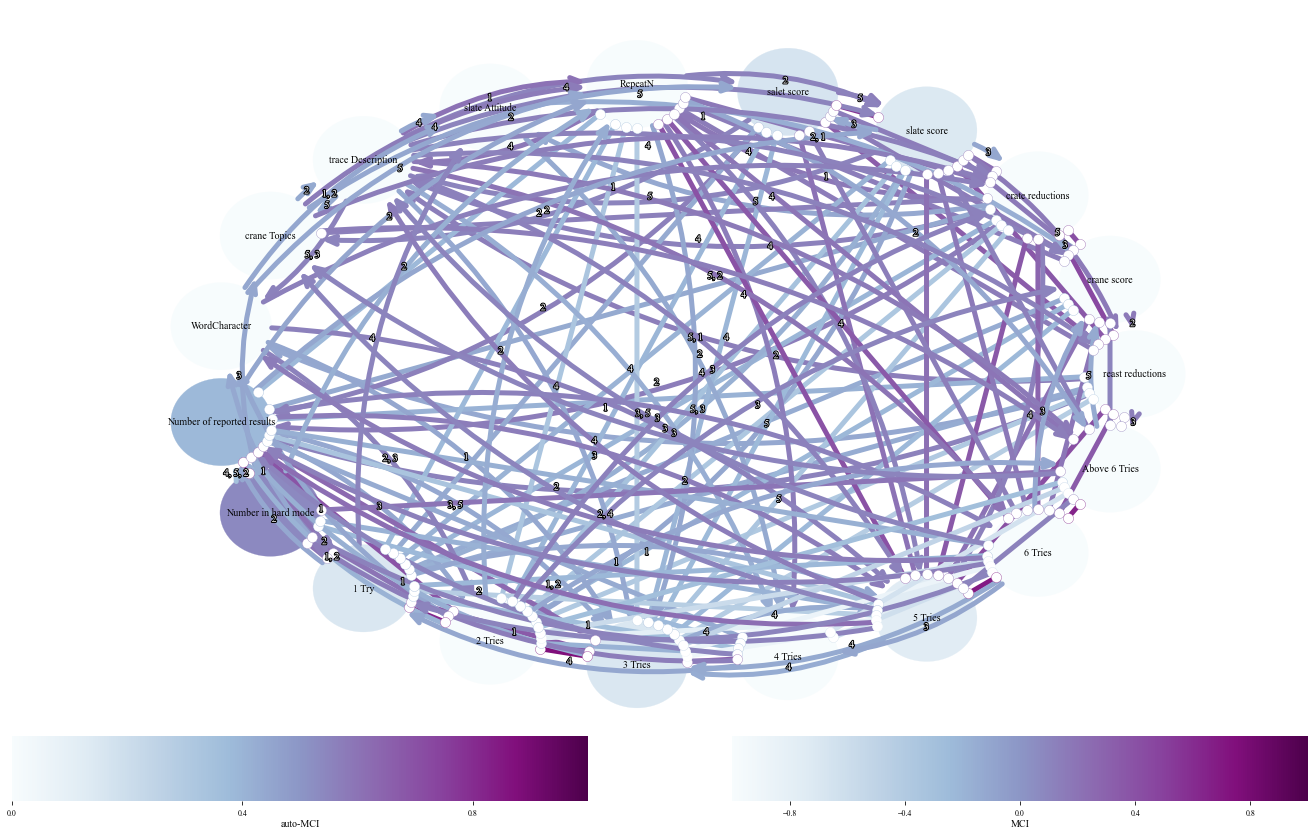

In [120]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=datainfer.columns,figsize=(20,15),cmap_edges="BuPu",cmap_nodes="BuPu"
    )
plt.show()

In [125]:
# encoding:gbk
# Imports
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb
from tigramite.models import LinearMediation, Prediction
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.dates as md
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import joblib

In [132]:
dataprec=datainfer

In [133]:
def plotclusteri(ax,target,NAME):
    #预测
    names=datainfer.columns
    train=datainfer
    dataframe = pp.DataFrame(np.array(train),var_names=names)
    pred = Prediction(dataframe=dataframe,
            cond_ind_test=ParCorr(),   #CMIknn ParCorr
            prediction_model = MLPRegressor(),
    #prediction_model = sklearn.gaussian_process.GaussianProcessRegressor(),
    # prediction_model = sklearn.neighbors.KNeighborsRegressor(),
        data_transform=None,
        train_indices= range(int((train.shape[0]))),
        # test_indices= range(int((train.shape[0]/data_all.shape[0])*data_all.shape[0]), data_all.shape[0]),
        test_indices= range(int((train.shape[0]))),
        verbosity=1
        )
    target = target
    tau_max = 5
    predictors = pred.get_predictors(
                      selected_targets=[target],
                      steps_ahead=1,
                      tau_max=tau_max,
                      pc_alpha=None
                  )

    N = train.shape[1]
    graph = np.zeros((N, N, tau_max+1), dtype='bool')
    for j in [target]:
        for p in predictors[j]:
            graph[p[0], j, abs(p[1])] = 1

    pred.fit(target_predictors=predictors,
                selected_targets=[target],
                    tau_max=tau_max)
    predicted = pred.predict(target)
    true_data = pred.get_test_array()[0]
    print("训练集MSE",mean_squared_error(true_data ,predicted))
    print("训练集R2",r2_score(true_data ,predicted))



    test=dataprec
    new_data = pp.DataFrame(np.array(test),var_names=names)
    predicted = pred.predict(target, new_data=new_data)
    true_data = pred.get_test_array()[0]
    ax.scatter(true_data, predicted)
    ax.set_title(r"NRMSE = %.2f" % (np.abs(true_data - predicted).mean()/true_data.std()))
    ax.plot(true_data, true_data, 'k-')
    ax.set_xlabel('True test data'+NAME)
    ax.set_ylabel('Predicted test data'+NAME)
    print("测试集MSE",mean_squared_error(true_data ,predicted))
    print("测试集R2",r2_score(true_data ,predicted))
    print("测试集MAE",mean_absolute_error(true_data ,predicted))


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 5
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable reast reductions has 12 link(s):
    [pc_alpha = 0.3]
        (crane score -2): max_pval = 0.01029, min_val =  0.138
        (slate score -5): max_pval = 0.05883, min_val =  0.102
        (trace Description -1): max_pval = 0.08526, min_val =  0.093
        (trace Description -4): max_pval = 0.08820, min_val =  0.091
        (salet score -4): max_pval = 0.19229, min_val = -0.071
        (RepeatN -1): max_pval = 0.19308, min_val = -0.070
        (crane Topics -2): max_pval = 0.21340, min_val = -0.067
        (2 Tries -2): max_pval = 0.21955, min_val = -0.066
        (slate score -2): max_pval = 0.22903, min_val =  0.066
        (trace Description -3): max_pval = 0.22289, min_val = -0.065
        (crate reductions -4): max_pval = 

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


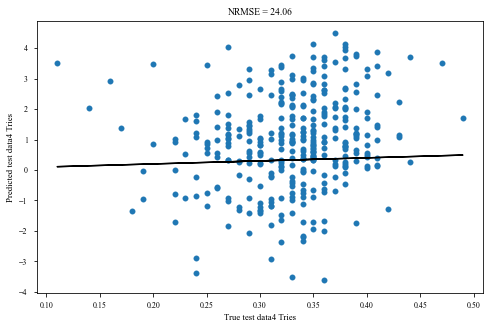

In [134]:
fig, axs = plt.subplots(1,1,figsize=(8, 5))
ax=plt.subplot(1,1,1)
plotclusteri(ax,list(datainfer_test.columns).index("4 Tries"),"4 Tries")